# 1. Import

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 2. Function

In [43]:
# Function to plot training and validation metrics
def plot_history(history_df, metric, ax, title=None):
    """
    Plots the training and validation metrics over epochs.

    Parameters:
        history_df (pd.DataFrame): DataFrame containing training history with columns
                                   'epoch', '<metric>', 'val_<metric>'.
        metric (str): The metric to plot (e.g., 'accuracy', 'loss').
        ax (matplotlib.axes._axes.Axes): The axes object where the plot will be drawn.
        title (str, optional): The title for the plot.
    
    Returns:
        None: Displays the plot.
    """
    ax.plot(history_df['epoch'], history_df[metric], label=f'Training {metric}')
    ax.plot(history_df['epoch'], history_df[f'val_{metric}'], label=f'Validation {metric}')
    ax.set_title(title or f'{metric.capitalize()} History')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)

# Generic function to plot history for any group of models
def plot_model_history(history_dir, models, metrics, figsize=(12, 10)):
    """
    Plots the training and validation metrics for a given set of models.

    Parameters:
        history_dir (str): The directory where the history log files are stored.
        models (list): List of model names (e.g., ['unet_gadf', 'unet_rgb']).
        metrics (list): List of metrics to plot (e.g., ['loss', 'accuracy']).
        figsize (tuple): The figure size for the plot (default: (12, 10)).
    
    Returns:
        None: Displays the plot.
    """
    # Initialize the plotting area
    fig, axs = plt.subplots(len(metrics), len(models), figsize=figsize)
    
    # Ensure axs is 2D, even if there's only one metric/model
    if len(metrics) == 1:
        axs = axs.reshape(1, len(models))
    if len(models) == 1:
        axs = axs.reshape(len(metrics), 1)
    
    # Plot for each model and metric
    for i, model in enumerate(models):
        history_file = os.path.join(history_dir, f"{model}.log")
        history_df = pd.read_csv(history_file)
        
        for j, metric in enumerate(metrics):
            ax = axs[j, i]
            plot_history(history_df, metric, ax, title=f'{model} - {metric.capitalize()}')

    plt.tight_layout()
    plt.show()

In [44]:
# Set the path to the directory containing history files
history_dir = r"C:\Users\Michele Puglia\Desktop\CODICI TESI MAGISTRALE\results\log_train_history"

# 3. U-net

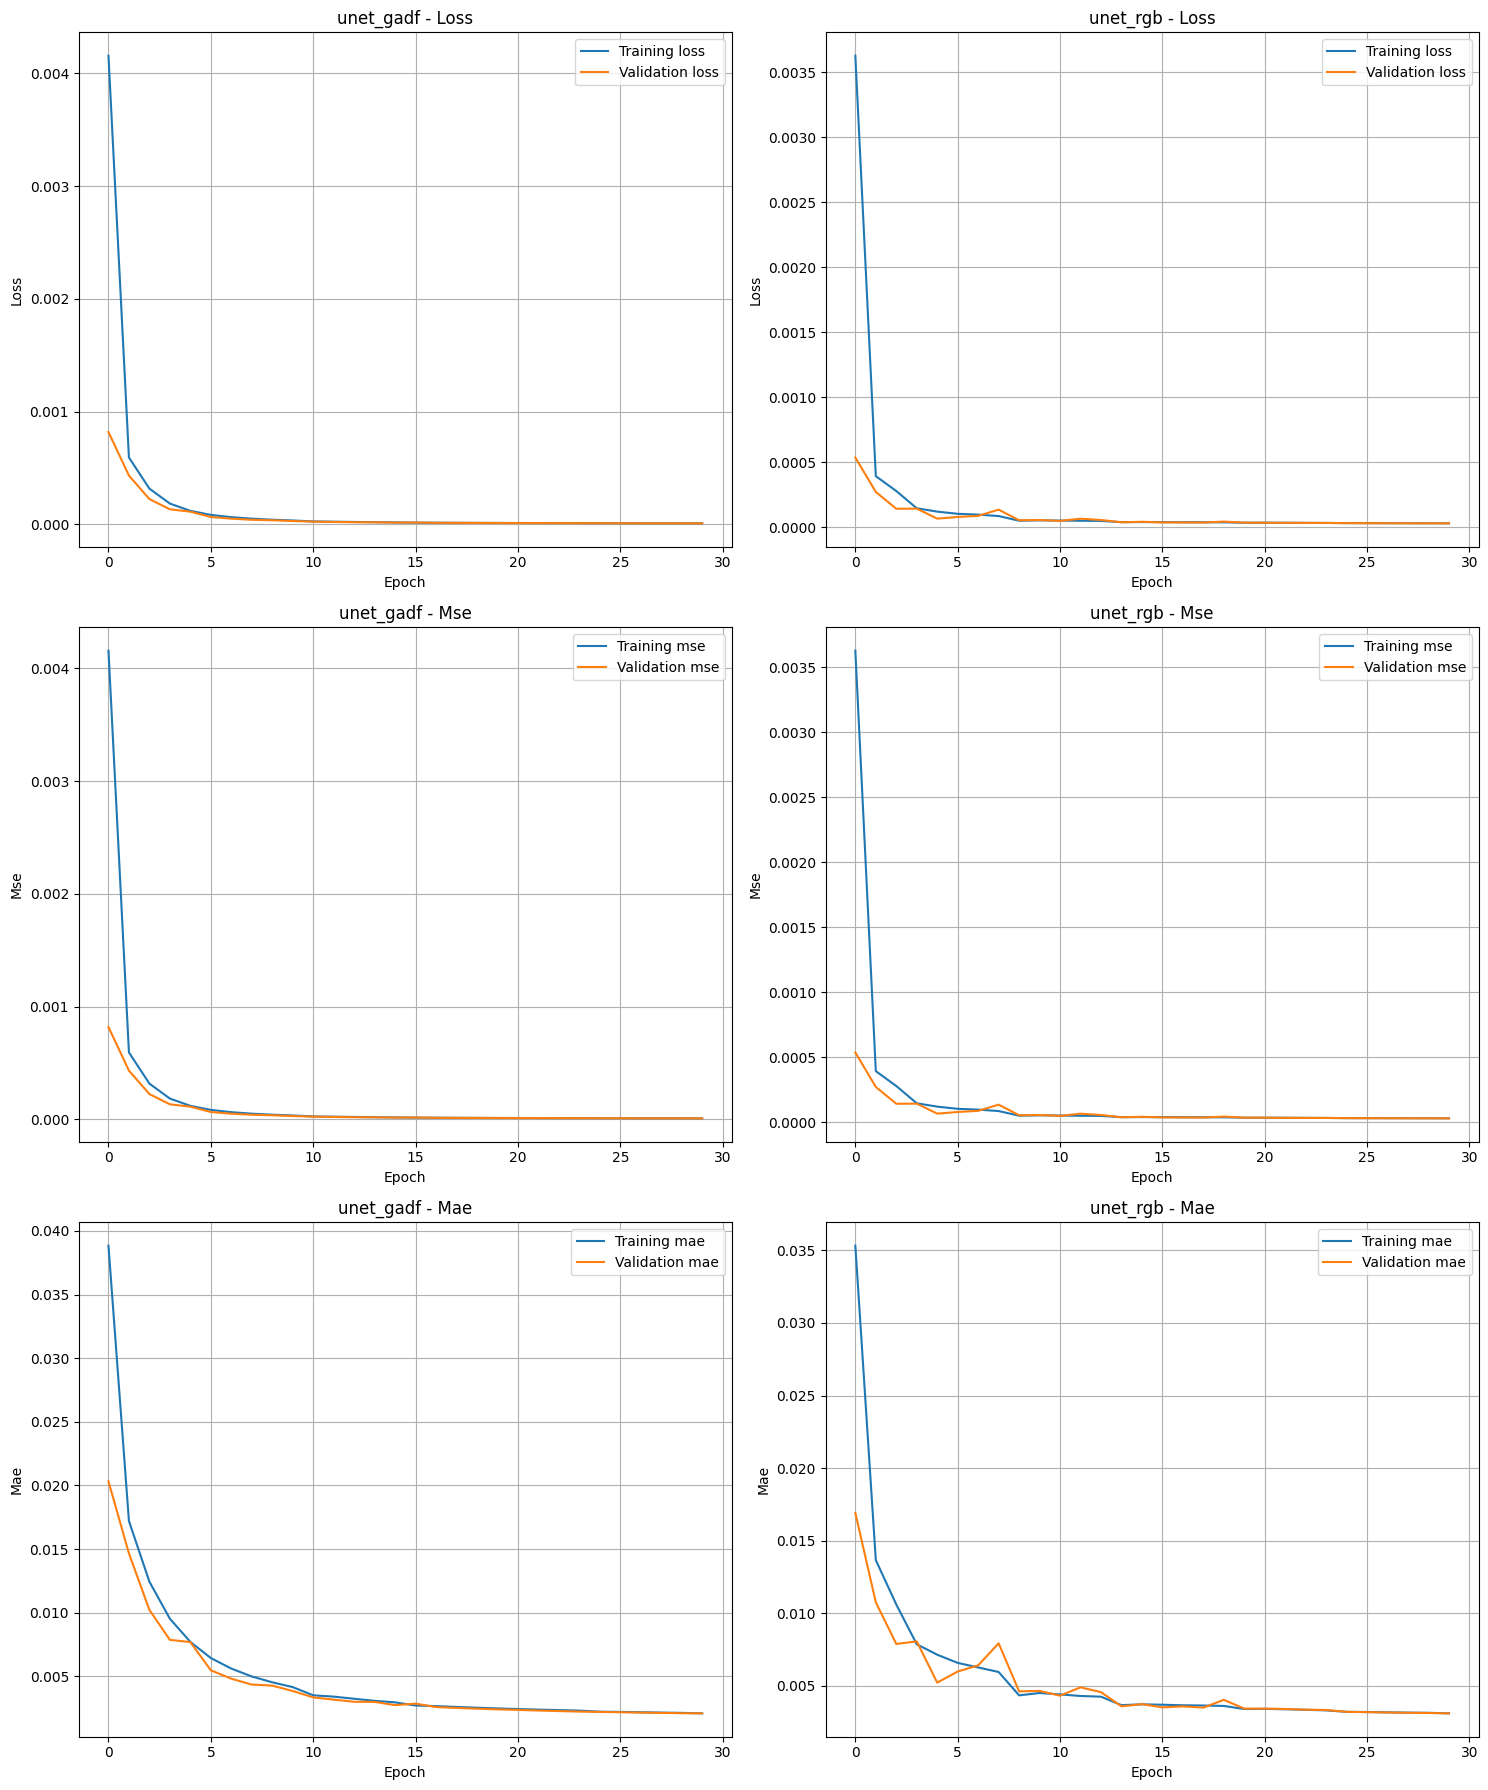

In [45]:
# Plot for Unet (loss, mse, mae)
unet_models = ["unet_gadf", "unet_rgb"]
unet_metrics = ['loss', 'mse', 'mae']
plot_model_history(history_dir, unet_models, unet_metrics, figsize=(15, 18))

# 4. CNN

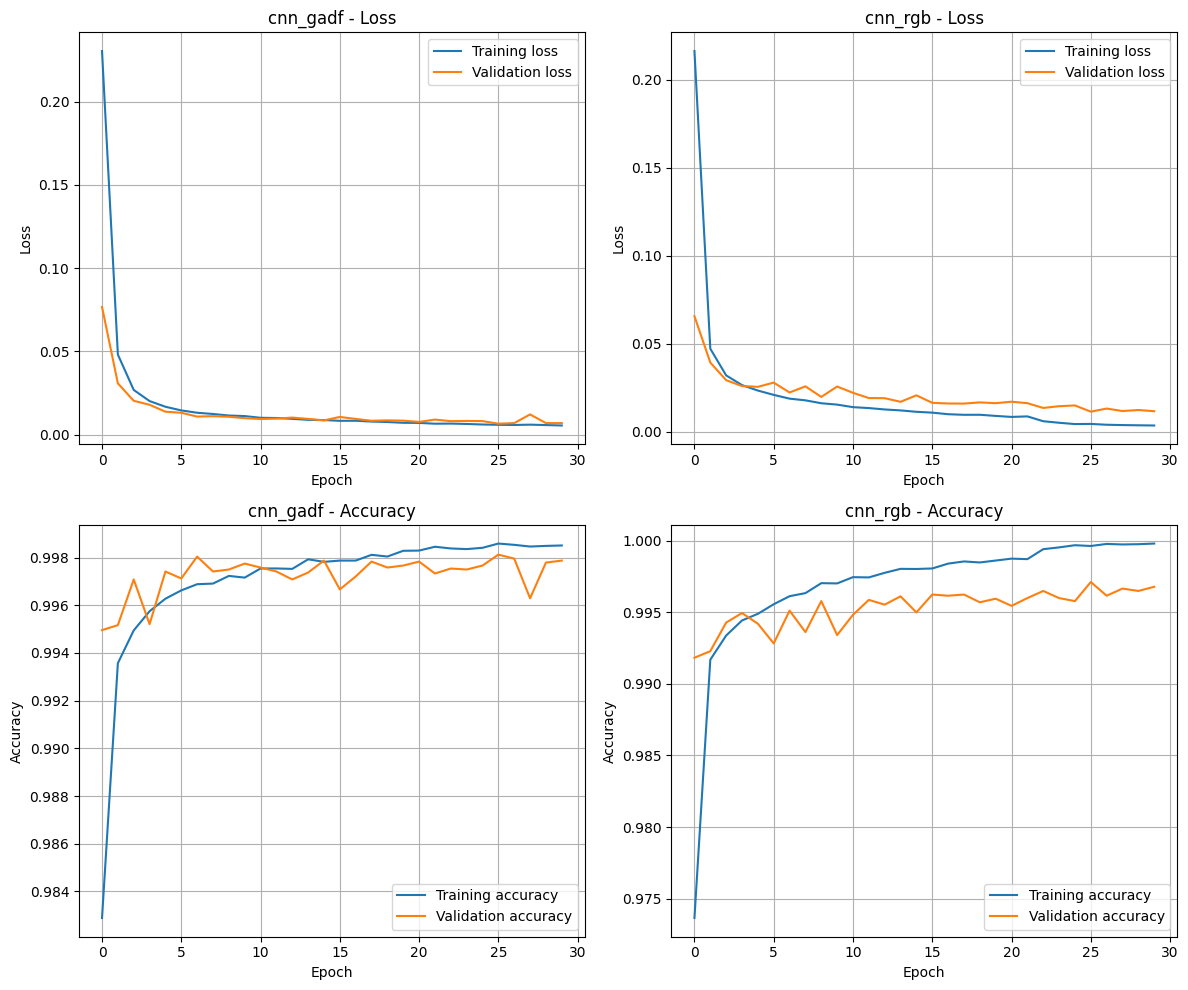

In [46]:
# Plot for CNN (loss, accuracy)
cnn_models = ["cnn_gadf", "cnn_rgb"]
cnn_metrics = ['loss', 'accuracy']
plot_model_history(history_dir, cnn_models, cnn_metrics, figsize=(12, 10))

# 5.ViT

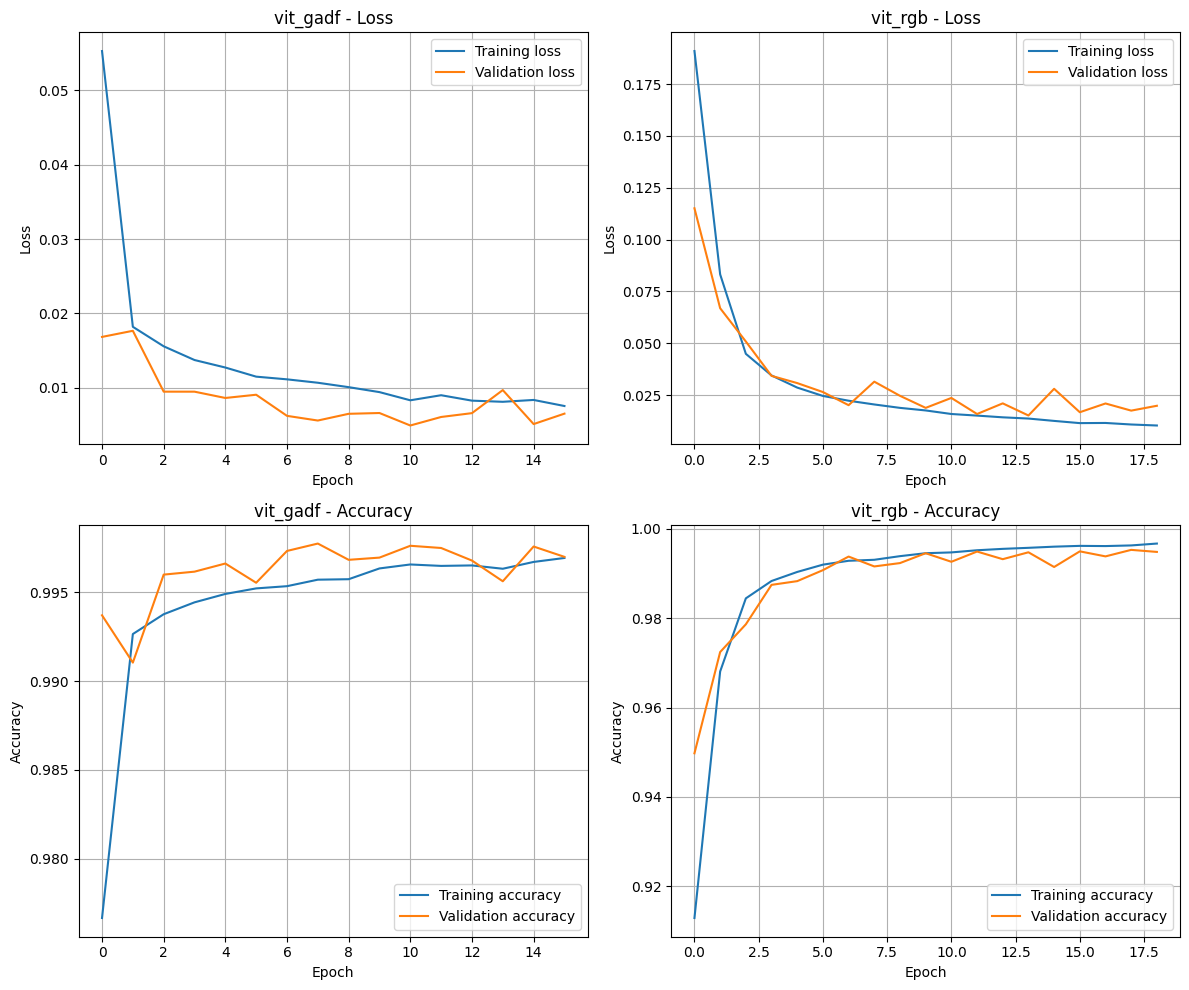

In [47]:
# Plot for Vit (loss, accuracy)
vit_models = ["vit_gadf", "vit_rgb"]
vit_metrics = ['loss', 'accuracy']
plot_model_history(history_dir, vit_models, vit_metrics, figsize=(12, 10))